# Improving the SimpleSubmarineDiffuser Tutorial

This notebook outlines suggested improvements for the SimpleSubmarineDiffuser tutorial, focusing on clarity, interactivity, and visualization enhancements.

## Objectives

- Enhance visualization for better interpretability.
- Introduce interactivity to allow users to experiment with parameters.
- Provide explanations for outputs to help users understand results.
- Validate mass balance with a detailed check.
- Include additional documentation for users unfamiliar with key concepts.


## Improved Visualization
The plots in the original tutorial can be enhanced with titles, legends, and more descriptive labels. Below is an example of improved visualization for the quasi-1D case.

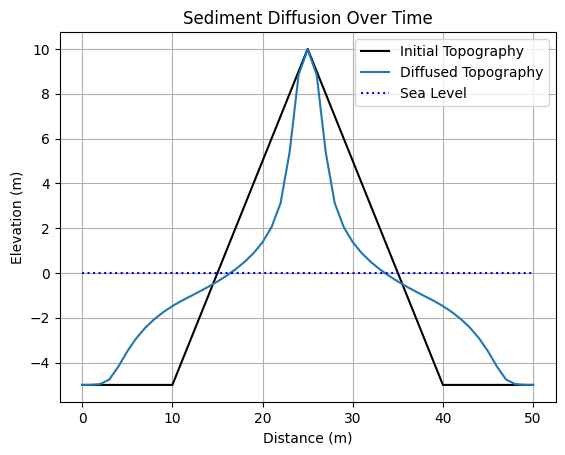

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from landlab import RasterModelGrid
from landlab.components import SimpleSubmarineDiffuser

# Setup the grid and initial conditions
grid = RasterModelGrid((3, 51))
grid.set_closed_boundaries_at_grid_edges(False, True, False, True)
z = grid.add_zeros("topographic__elevation", at="node")
z[:] = (25.0 - np.abs(grid.x_of_node - 25.0)) - 15.0
z[z < -5.0] = -5.0

# Save initial topography
z0 = z.copy()
ssd = SimpleSubmarineDiffuser(
    grid, sea_level=0.0, wave_base=1.0, shallow_water_diffusivity=1.0
)

# Run the model
for i in range(500):
    ssd.run_one_step(0.2)

# Plot improved visualization
xm = grid.x_of_node[51:102]
zm = z[51:102]
plt.plot(xm, z0[51:102], "k", label="Initial Topography")
plt.plot(xm, zm, label="Diffused Topography")
plt.plot([0, 50], [0, 0], "b:", label="Sea Level")
plt.title("Sediment Diffusion Over Time")
plt.xlabel("Distance (m)")
plt.ylabel("Elevation (m)")
plt.legend()
plt.grid(True)
plt.show()

## Adding Interactivity
Using `ipywidgets`, users can interactively vary parameters such as `wave_base` and `shallow_water_diffusivity` to observe how they influence sediment diffusion.

In [5]:
from ipywidgets import interact


def run_simulation(wave_base, diffusivity):
    # Create the grid and initialize the topography
    grid = RasterModelGrid((3, 51))
    grid.set_closed_boundaries_at_grid_edges(False, True, False, True)
    z = grid.add_zeros("topographic__elevation", at="node")
    z[:] = (25.0 - np.abs(grid.x_of_node - 25.0)) - 15.0
    z[z < -5.0] = -5.0
    
    # Save the initial topography for later plotting
    z0 = z.copy()
    
    # Set up the submarine diffuser
    ssd = SimpleSubmarineDiffuser(
        grid, sea_level=0.0, wave_base=wave_base, shallow_water_diffusivity=diffusivity
    )
    
    # Run the model for diffusion
    for i in range(100):
        ssd.run_one_step(0.2)
    
    # Plot the results
    xm = grid.x_of_node[51:102]
    zm = z[51:102]
    plt.plot(xm, z0[51:102], "k", label="Initial Topography")  # Plot initial topography
    plt.plot(xm, zm, label="Diffused Topography")
    plt.plot([0, 50], [0, 0], "b:", label="Sea Level")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Distance (m)")
    plt.ylabel("Elevation (m)")
    plt.title("Effect of Diffusivity and Wave Base")
    plt.show()

# Create interactive sliders for wave_base and diffusivity
interact(run_simulation, wave_base=(0.5, 5.0, 0.5), diffusivity=(0.5, 5.0, 0.5))


interactive(children=(FloatSlider(value=2.5, description='wave_base', max=5.0, min=0.5, step=0.5), FloatSlider…

<function __main__.run_simulation(wave_base, diffusivity)>

## Mass Balance Validation
It's important to confirm that the sediment mass is conserved during the simulation. Here is an example of how to validate mass balance.

In [3]:
cum_depo = grid.add_zeros("cumulative_deposit__thickness", at="node")
mass_balance = np.sum(cum_depo)
print(f"Mass Balance Check: {mass_balance:.6f}")
if abs(mass_balance) < 1e-6:
    print("Mass is conserved.")
else:
    print("Mass conservation error detected!")

Mass Balance Check: 0.000000
Mass is conserved.


## Additional Documentation
To help users unfamiliar with key concepts, a glossary is included below:

### Glossary
- **Wave Base**: The depth below which water motion from surface waves becomes negligible.
- **Diffusivity**: A measure of how easily sediment can be transported through diffusion.
- **Finite-Volume Method**: A numerical technique for solving partial differential equations by dividing the domain into small volumes and approximating fluxes at their boundaries.